# Plotting Code for Editorial

Code to plot HECKTOR saturation figure for editorial titled "Evolving Horizons in Radiotherapy Auto-Contouring: Distilling Insights, Embracing Data-Centric Frameworks, and Moving Beyond Geometric Quantification".

Note: Ran this out of Google Colab.

Last updated by: Kareem Wahid on January 16, 2024.


In [1]:
# General Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Only need to run if you're using a Colab Notebook in Google Drive enviornment
# Note: will request login credentials

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Autoseg_performance_saturation

Mounted at /content/drive
/content/drive/MyDrive/Autoseg_performance_saturation


In [3]:
# Note: if using a Google Colab enviornment, make sure to upload file to appopriate folder, excel file avaliable on GitHub
file_path = 'HECKTOR_data_full.xlsx'
df = pd.read_excel(file_path)

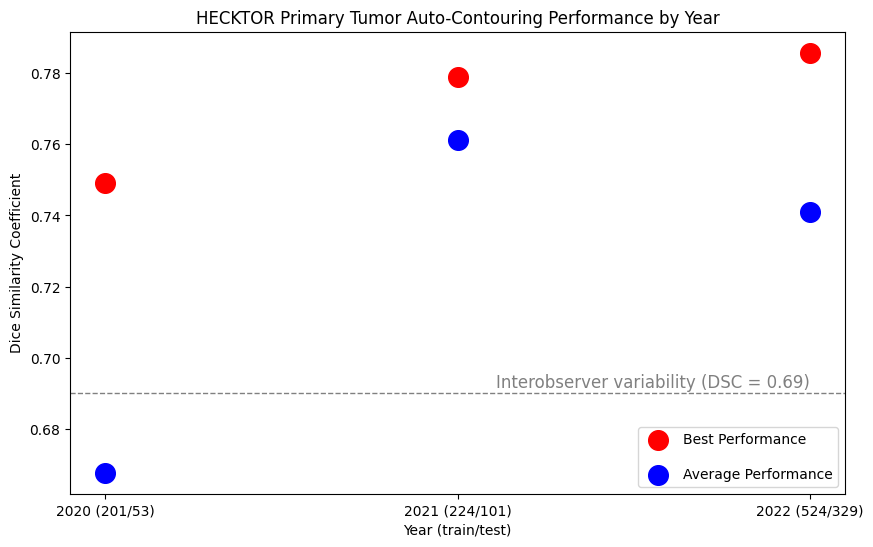

In [5]:
# Calculate the percentiles for DSC for each year
summary = df.groupby('HECKTOR_edition').DSC.agg(
    max = 'max',
    top_10_percentile=lambda x: x.quantile(0.9),
    median='median',
    mean_top_3=lambda x: x.nlargest(3).mean(),  # Calculate mean of top 3 (i.e., winners)
).reset_index()

# Plot
plt.figure(figsize=(10, 6))

# Dot plot for mean of top 3 performances
plt.scatter(summary['HECKTOR_edition'], summary['mean_top_3'],
            color='red', label='Best Performance', s=200)  # Added line for mean of top 3

# Dot plot for median performance
plt.scatter(summary['HECKTOR_edition'], summary['median'],
            color='blue', label='Average Performance', s = 200)

# Add a horizontal line to indicate a DSC of 0.69
plt.axhline(y=0.69, color='grey', linestyle='--', linewidth=1)

# Add text on top of the line
max_year = summary['HECKTOR_edition'].max()  # Get the max year for positioning the text
plt.text(max_year, 0.69 + 0.0005, 'Interobserver variability (DSC = 0.69)',
         color='grey', ha='right', va='bottom', fontsize=12)


plt.xlabel('Year (train/test)')
plt.ylabel('Dice Similarity Coefficient')
plt.title('HECKTOR Primary Tumor Auto-Contouring Performance by Year')
plt.xticks([2020, 2021, 2022], ["2020 (201/53)", "2021 (224/101)", "2022 (524/329)"]) # Modify x-axis ticks
plt.legend(loc='lower right', labelspacing=1.5) # Increase the spacing between legend items
plt.show()

In [6]:
!pip freeze # show all the installed packages in Colab at the time of running

absl-py==1.4.0
aiohttp==3.9.1
aiosignal==1.3.1
alabaster==0.7.16
albumentations==1.3.1
altair==4.2.2
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-record==0.5.0
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.0
attrs==23.2.0
audioread==3.0.1
autograd==1.6.2
Babel==2.14.0
backcall==0.2.0
beautifulsoup4==4.11.2
bidict==0.22.1
bigframes==0.19.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.3
bqplot==0.12.42
branca==0.7.0
build==1.0.3
CacheControl==0.13.1
cachetools==5.3.2
catalogue==2.0.10
certifi==2023.11.17
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.7
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpickle==2.2.1
cmake==3.27.9
cmdstanpy==1.2.0
colorcet==3.0.1
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.4
cons==0.4.6
contextlib2==21.6.0
contourpy==1.2.0
cryptography==41.0.7
cufflinks==0.17.3
cupy-cuda12x==12.2.0
cvxopt==1.3.2
cvxpy==1.3.2
cycler==0.12.1
c